## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [9]:
from sklearn import tree, metrics
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import pydot

In [4]:
boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)

#調整max_depth觀察何時開始overfitting
for i in range(3, 20):
    clf = tree.DecisionTreeRegressor(random_state = 0, max_depth = i)
    clf.fit(train_X, train_y)
    pred_y = clf.predict(test_X)
    score = metrics.r2_score(pred_y, test_y)
    print('max_depth = ', i, ', score:', score)
    
    #匯出訓練後decision tree model的graph
    tree.export_graphviz(clf, out_file='boston%d.dot' %i) 
    (graph,) = pydot.graph_from_dot_file('boston%d.dot' %i)
    graph.write_png('boston%d.png' %i)

max_depth =  3 , score: 0.6571968060114224
max_depth =  4 , score: 0.8466279846374564
max_depth =  5 , score: 0.8230210317857996
max_depth =  6 , score: 0.823121891818997
max_depth =  7 , score: 0.8541163762079237
max_depth =  8 , score: 0.803845917176801
max_depth =  9 , score: 0.7010361116005379
max_depth =  10 , score: 0.821974446092342
max_depth =  11 , score: 0.7221694211728183
max_depth =  12 , score: 0.8293036186983069
max_depth =  13 , score: 0.7548133162215471
max_depth =  14 , score: 0.7388587527707213
max_depth =  15 , score: 0.7634936128489475
max_depth =  16 , score: 0.757922238826467
max_depth =  17 , score: 0.757922238826467
max_depth =  18 , score: 0.757922238826467
max_depth =  19 , score: 0.757922238826467


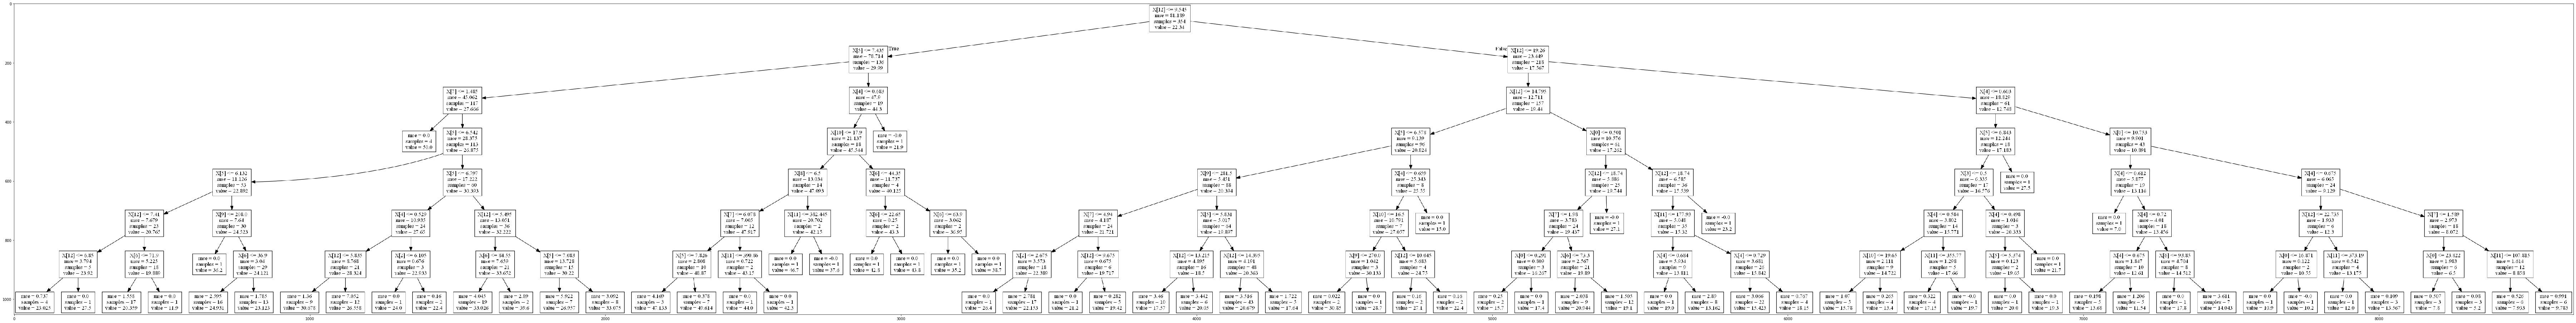

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize = (160,16))
img = mpimg.imread('boston7.png')
plt.imshow(img)
plt.show()